In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
#Import dataset
data= pd.read_csv("diabetes.csv")

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Pre-processing block

In [5]:
#Train, test and validation spilt
from sklearn.model_selection import train_test_split

data_set_values=np.array(data)
number_of_rows,number_of_cols=data.shape
train, test = train_test_split(data_set_values, test_size = 0.4,random_state=57)
test, validate = train_test_split(test, test_size = 0.5,random_state=3)

In [6]:
#Spilt all sets into input and output sets
train_x=train[:,:number_of_cols-1]
train_y=train[:,[number_of_cols-1]]

test_x=test[:,:number_of_cols-1]
test_y=test[:,[number_of_cols-1]]

validate_x=validate[:,:number_of_cols-1]
validate_y=validate[:,[number_of_cols-1]]

#perform normalization on the input data set
input_data= np.vstack((train_x,test_x,validate_x))
mean_data = np.mean(input_data, axis=0)
std_data = np.std(input_data, axis=0)
train_x = (train_x - mean_data)/std_data
test_x = (test_x - mean_data)/std_data
validate_x = (validate_x - mean_data)/std_data

In [7]:
#End of Pre-processing block

In [8]:
#Start of Logistic Regression - Part 1

In [9]:
#Logistic Regression - Model Definition
class logisticRegression:
    def __init__(self,total_iterations,learning_rate):
        self.learning_rate=learning_rate
        self.total_iterations=total_iterations
        self.bias=0
        
    #Activation function
    def sigmoidFunction(self,X): 
        return 1/(1+np.exp(-X))
#         return 1/(1+scipy.special.expit(-X))
    
    #Training function
    def train(self,input,Y): 

        rows,cols=input.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        costList=[]
        iterationList=[]
        for _ in range(self.total_iterations+1):
            # y= x * w + b
            output=np.dot(input,self.w)+self.bias
            
            #apply Activating function
            Z=self.sigmoidFunction(output)
            
            #calculating cost
            cost=(-1/self.m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))
            
            if _%1000==0:
#                 print("loss during ",_," iteration =",cost)
                iterationList.append(_)
                costList.append(cost)
            
            #Gradient Descent
            dw=(1/self.m)*np.dot(input.T,np.subtract(Z,Y))
            db=(1/self.m)*np.sum(np.subtract(Z,Y))
            
            #updating weights and bais (Learning Part)
            self.w = self.w-self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
        plt.plot(iterationList, costList)
        plt.title("Cost Relation")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        return 

    #Prediction function
    def predict(self,input):
        output=np.dot(input,self.w)+self.bias
        Z=self.sigmoidFunction(output)
        # if output more than 0.5 then yes else no. (Binary Classification)
        prediction=[]
        for i in Z:
            if i>=0.5:
                prediction.append(1)
            else:
                prediction.append(0)
        return prediction

In [92]:
model=logisticRegression(total_iterations=10000,learning_rate=0.001)

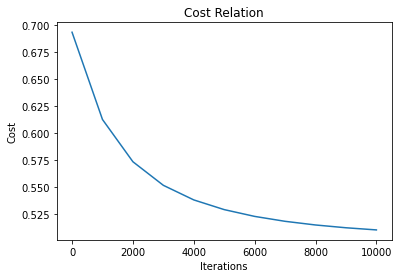

In [93]:
model.train(train_x,train_y)

In [94]:
from sklearn.metrics import accuracy_score
test_prediction = model.predict(test_x)

In [95]:
print("Accuracy = ", accuracy_score(test_y,test_prediction))

Accuracy =  0.8116883116883117


In [14]:
#End of Logistic Regression - Part 1

In [ ]:
#Start of Neural Net using L2 regularization - Part 2

In [97]:
import tensorflow as tf
tf.random.set_seed(221)
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2
from tensorflow.keras import optimizers

input_shape = train_x.shape
neuralNetwork = Sequential()
neuralNetwork.add(Dense(512, input_dim=input_shape[1], activation='relu',kernel_regularizer=regularizers.L1L2( l2=0.1)))
neuralNetwork.add(Dense(4, activation='relu'))
neuralNetwork.add(Dense(1, activation='sigmoid' ))
# Compile the model
neuralNetwork.compile(loss='binary_crossentropy',  
                     optimizer=optimizers.Adam(learning_rate=0.005),
                     metrics=['accuracy'])
neuralNetwork.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 2052      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 6,665
Trainable params: 6,665
Non-trainable params: 0
_________________________________________________________________


In [98]:
#train the model
history = neuralNetwork.fit(train_x,
                        train_y,
                        validation_data=(validate_x, validate_y),
                        epochs=100,
                        batch_size=20,
                        verbose=0)

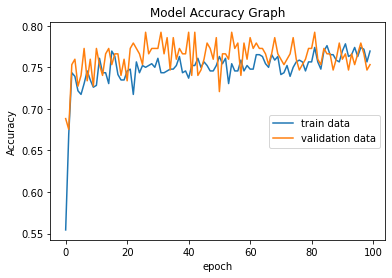

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train data', 'validation data'], loc='center right')
plt.show()

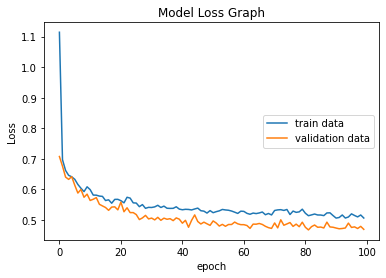

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train data', 'validation data'], loc='center right')
plt.show()

In [102]:
from sklearn.metrics import accuracy_score
score = neuralNetwork.evaluate( 
                x=test_x,
                y=test_y,
                verbose=0
                )
print("Accuracy :",score[1])

Accuracy : 0.8246753215789795


In [103]:
#End of Neural Net using L2 regularization - part 2

In [104]:
#Start of part 3 - NN using L2 regularization and NN using Dropout

In [112]:
# NN using L2 regularization
import tensorflow as tf
tf.random.set_seed(221)
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2
from tensorflow.keras import optimizers
from keras.layers import Dropout

input_shape = train_x.shape
nn1 = Sequential()
# L2 Regularizer
nn1.add(Dense(256, input_dim=input_shape[1], activation='relu',kernel_regularizer=regularizers.L1L2( l2=0.1)))
nn1.add(Dense(1, activation='sigmoid' ))
# Compile the model
nn1.compile(loss='binary_crossentropy',  
                     optimizer=optimizers.Adam(learning_rate=0.005),
                     metrics=['accuracy'])
nn1.summary()
history1 = nn1.fit(train_x,
                        train_y,
                        validation_data=(validate_x, validate_y),
                        epochs=100,
                        batch_size=20,
                        verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [113]:
# NN using Dropout
import tensorflow as tf
tf.random.set_seed(221)
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2
from tensorflow.keras import optimizers
from keras.layers import Dropout

input_shape = train_x.shape

nn2 = Sequential()
# Dropout model
nn2.add(Dense(256, input_dim=input_shape[1], activation='relu'))
nn2.add(Dropout(0.2))
nn2.add(Dense(1, activation='sigmoid' ))
# Compile the model
nn2.compile(loss='binary_crossentropy',  
                     optimizer=optimizers.Adam(learning_rate=0.005),
                     metrics=['accuracy'])
nn2.summary()
history2 = nn2.fit(train_x,
                        train_y,
                        validation_data=(validate_x, validate_y),
                        epochs=100,
                        batch_size=20,
                        verbose=0)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               2304      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


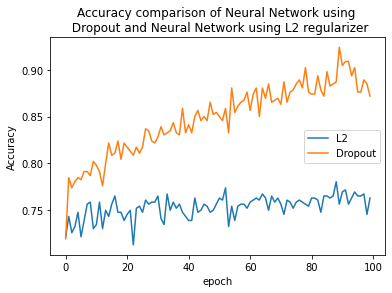

In [114]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('Accuracy comparison of Neural Network using \n Dropout and Neural Network using L2 regularizer')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'Dropout'], loc='center right')
plt.show()

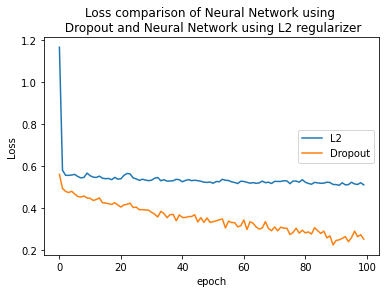

In [115]:
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('Loss comparison of Neural Network using \n Dropout and Neural Network using L2 regularizer')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['L2', 'Dropout'], loc='center right')
plt.show()

In [ ]:
#End of part 3 